<a href="https://colab.research.google.com/github/GamerKing1403/ProgrammingProjects/blob/master/Copy_of_2022_02_04_TusharJain_CapstoneProject16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the required modules and load the dataset.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math
import statsmodels.api as sm
df = pd.read_csv("https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
# Get the information on DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [3]:
# Check if there are any null values. If any column has null values, treat them accordingly
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [4]:
# Drop 'Unnamed: 0' column as it is of no use
df.drop('Unnamed: 0', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


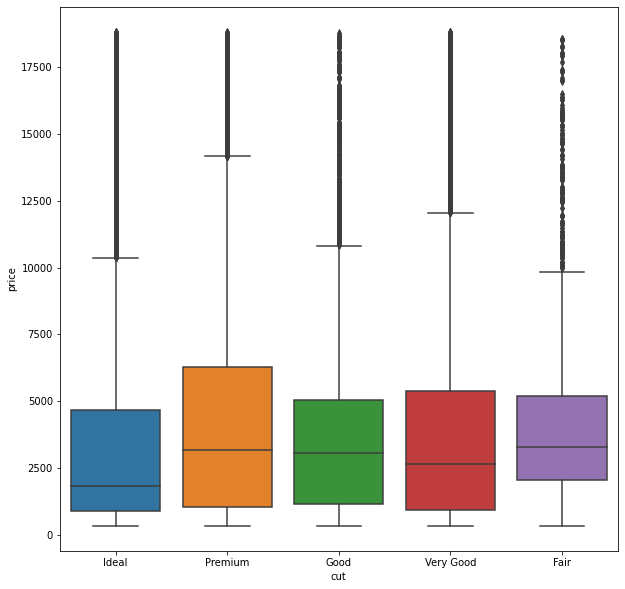

In [5]:
# Boxplot for 'cut' vs 'price'
plt.figure(figsize=(10, 10))
sns.boxplot(df['cut'], df['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


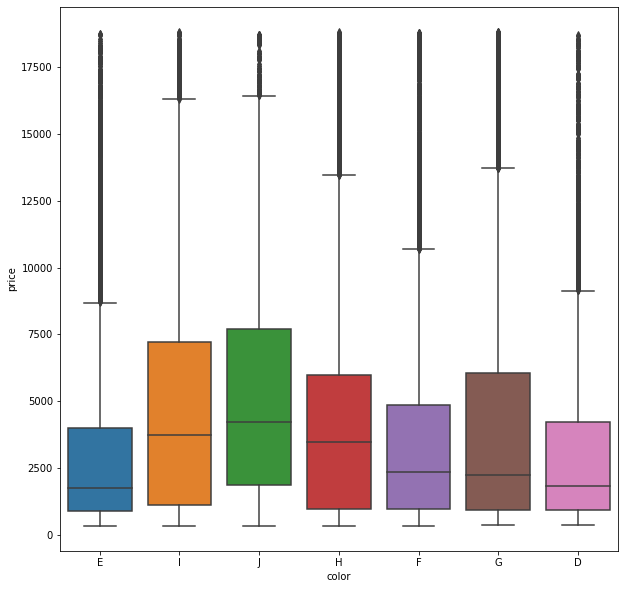

In [6]:
# Boxplot for 'color' vs 'price'
plt.figure(figsize=(10, 10))
sns.boxplot(df['color'], df['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


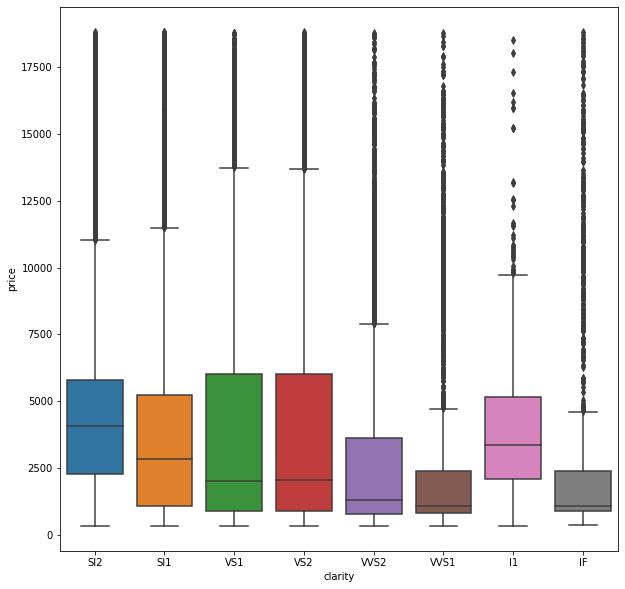

In [7]:
# Boxplot for 'clarity' vs 'price'
plt.figure(figsize=(10, 10))
sns.boxplot(df['clarity'], df['price'])

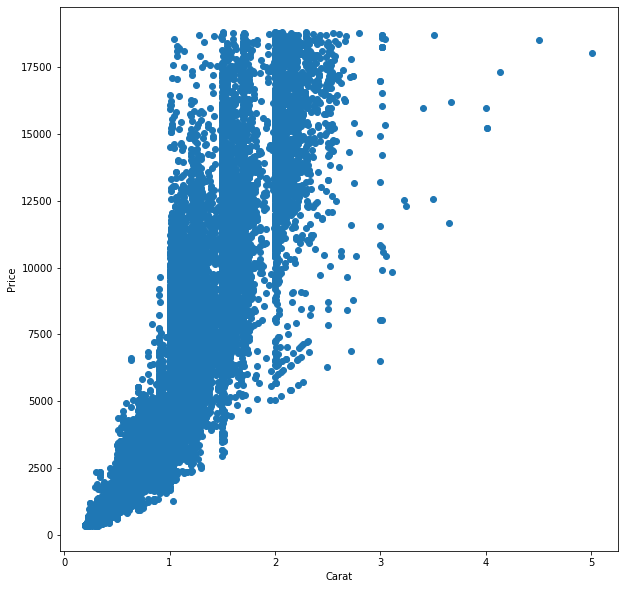

In [8]:
# Create scatter plot with 'carat' on X-axis and 'price' on Y-axis
plt.figure(figsize=(10, 10))
plt.xlabel("Carat")
plt.ylabel("Price")
plt.scatter(x=df['carat'], y=df['price'])

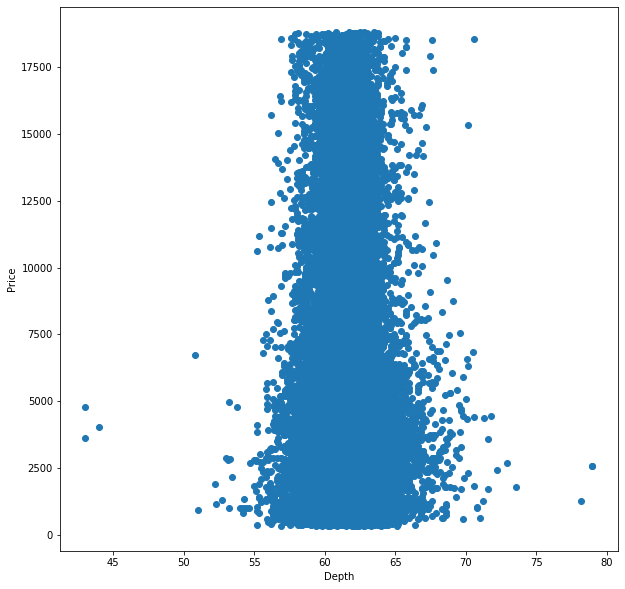

In [9]:
# Create scatter plot with 'depth' on X-axis and 'price' on Y-axis
plt.figure(figsize=(10, 10))
plt.xlabel("Depth")
plt.ylabel("Price")
plt.scatter(x=df['depth'], y=df['price']) 

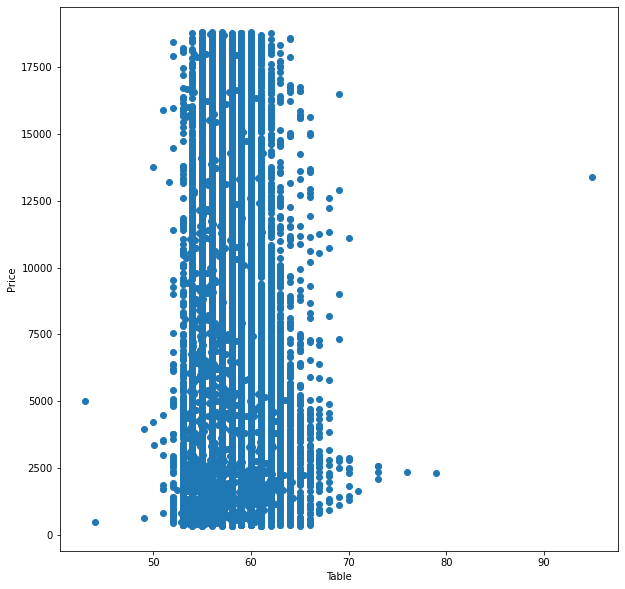

In [10]:
# Create scatter plot with 'table' on X-axis and 'price' on Y-axis
plt.figure(figsize=(10, 10))
plt.xlabel("Table")
plt.ylabel("Price")
plt.scatter(x=df['table'], y=df['price']) 

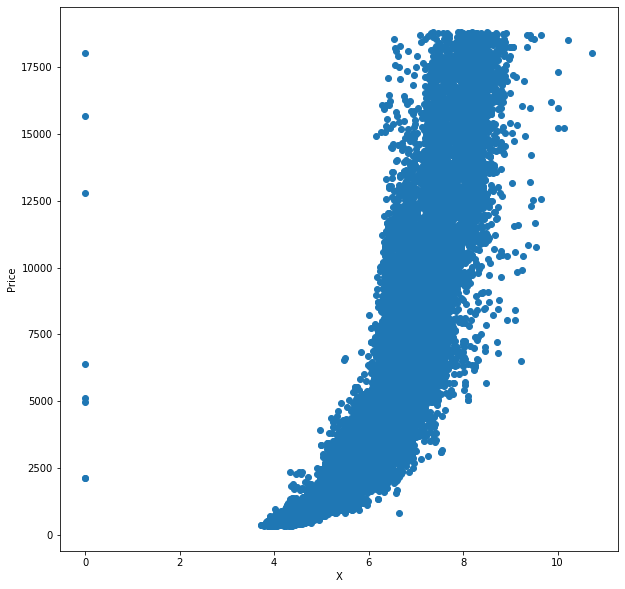

In [11]:
# Create scatter plot with attribute 'x' on X-axis and 'price' on Y-axis
plt.figure(figsize=(10, 10))
plt.xlabel("X")
plt.ylabel("Price")
plt.scatter(x=df['x'], y=df['price']) 

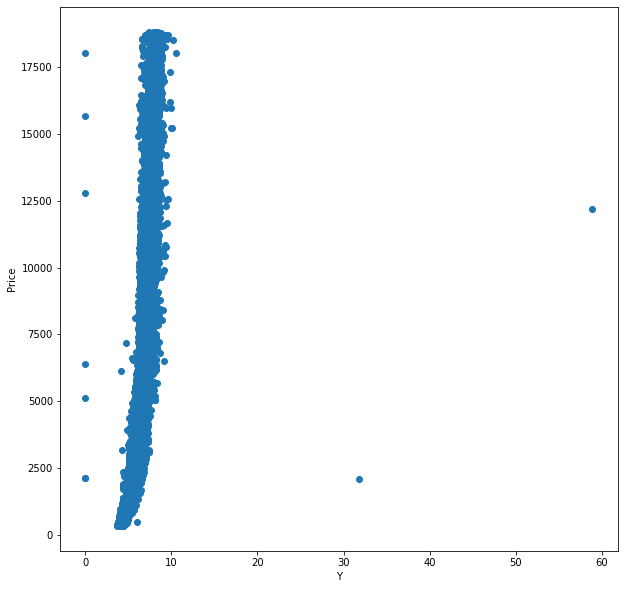

In [12]:
# Create scatter plot with attribute 'y' on X-axis and 'price' on Y-axis
plt.figure(figsize=(10, 10))
plt.xlabel("Y")
plt.ylabel("Price")
plt.scatter(x=df['y'], y=df['price']) 

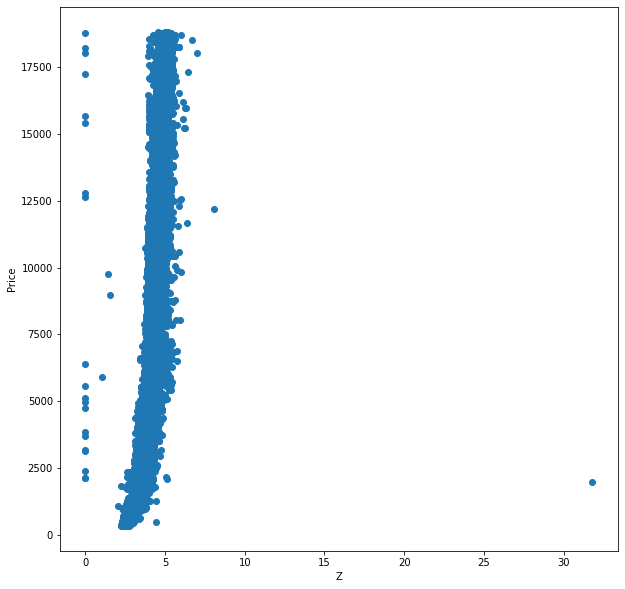

In [13]:
# Create scatter plot with 'z' on X-axis and 'price' on Y-axis
plt.figure(figsize=(10, 10))
plt.xlabel("Z")
plt.ylabel("Price")
plt.scatter(x=df['z'], y=df['price']) 

3932.799721913237


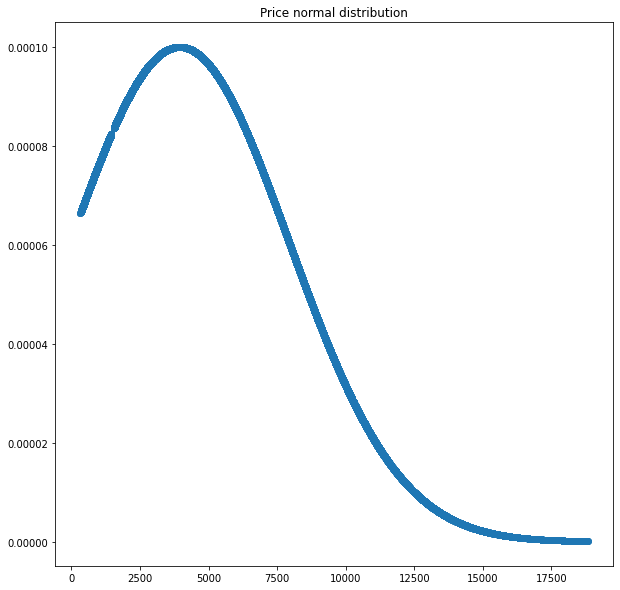

In [14]:
# Create a normal distribution curve for the `price`.
# Create a probablity density function for plotting the normal distribution
def pdf(x):
  std = x.std()
  mean = x.mean()
  exponent = math.e ** (-0.5*(((x-mean)/std)**2))
  const = 1/(std*math.sqrt(2*math.pi))
  return const*exponent
  

# Plot the normal distribution curve using plt.scatter() 
plt.figure(figsize=(10, 10))
plt.title("Price normal distribution")
plt.scatter(df['price'], pdf(df['price']))
print(df['price'].mean())

In [15]:
# Replace values of 'cut' column
df['cut'].replace({"Fair":1, "Good":2, "Very Good":3, "Premium":4, "Ideal":5}, inplace=True)

In [16]:
# Replace values of 'color' column
df['color'].replace({"D":1, "E":2, "F":3, "G":4, "H":5, "I":6, "J":7}, inplace=True)

In [17]:
# Replace values of 'clarity' column
df['clarity'].replace({"I1":1, "SI2":2, "SI1":3, "VS2":4, "VS1":5, "VVS2":6, "VVS1":7, "IF":8}, inplace=True)

In [18]:
# Create a list of feature variables.
features = list(df.columns)
features.remove('price')

In [19]:
# Build multiple linear regression model using all the features
# Split the DataFrame into the train and test sets such that test set has 33% of the values.
X = df[features]
y = df['price']
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.33, random_state=42)

# Build linear regression model using the 'sklearn.linear_model' module.
y_train_reshaped = np.array(y_train).reshape(-1, 1)
y_test_reshaped = np.array(y_test).reshape(-1, 1)

# Build linear regression model 
lr1 = LR()
lr1.fit(X_train, y_train_reshaped)

print("\nConstant".ljust(15, " "), f"{lr1.intercept_[0]:.6f}")

for item in list(zip(X_train.columns.values, lr1.coef_[0])):
  print(f"{item[0]}".ljust(15, " "), f"{item[1]:.6f}")


Constant       5423.680710
carat           10720.976566
cut             118.658153
color           -323.814246
clarity         504.014258
depth           -79.948794
table           -28.248563
x               -846.553635
y               23.150374
z               -29.512329


In [20]:
# Evaluate the linear regression model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module.
y_train_pred = lr1.predict(X_train)
y_test_pred = lr1.predict(X_test)

r2 = r2_score(y_train_pred, y_train)
MSE = mean_squared_error(y_train_pred, y_train)
MAE = mean_absolute_error(y_train_pred, y_train)
RMSE = np.sqrt(MSE)
print('TRAIN')

print(f"R2 Score = {r2:.6f}\nMSE = {MSE:.6f}\nMAE = {MAE:.6f}\nRMSE = {RMSE:.6f}")

r2 = r2_score(y_test_pred, y_test)
MSE = mean_squared_error(y_test_pred, y_test)
MAE = mean_absolute_error(y_test_pred, y_test)
RMSE = np.sqrt(MSE)
print()
print('TEST')
print(f"R2 Score = {r2:.6f}\nMSE = {MSE:.6f}\nMAE = {MAE:.6f}\nRMSE = {RMSE:.6f}")

TRAIN
R2 Score = 0.897399
MSE = 1494736.330174
MAE = 809.246937
RMSE = 1222.594099

TEST
R2 Score = 0.897470
MSE = 1450250.583427
MAE = 802.626298
RMSE = 1204.263502


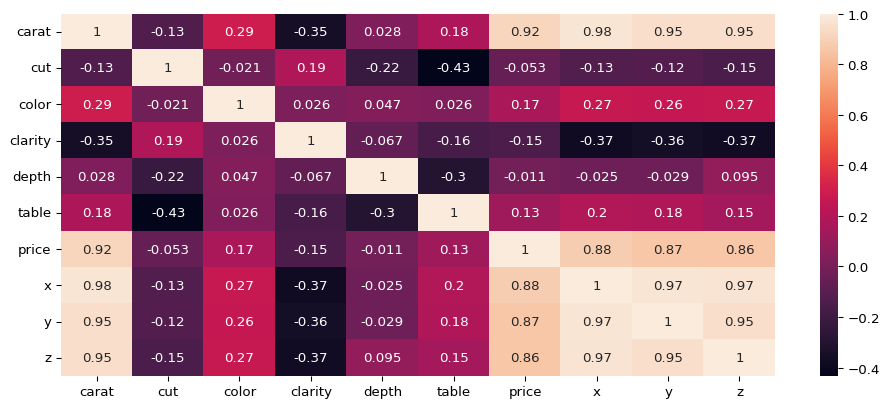

In [21]:
# Heatmap to pinpoint the columns in the 'df' DataFrame exhibiting high correlation
plt.figure(figsize = (12, 5), dpi = 96)
sns.heatmap(df.corr(), annot=True)
plt.show()

In [22]:
# Drop features highly correlated with 'carat'
df.drop(columns=['x', 'y', 'z'], axis=1, inplace=True)

In [23]:
# Again build a linear regression model using the remaining features
features = list(df.columns)
features.remove('price')

# Build linear regression model using the 'sklearn.linear_model' module.
X = df[features]
y = df['price']
X_train2, X_test2, y_train2, y_test2 = tts(X, y, test_size=0.33, random_state=42)
y_train2_reshaped = np.array(y_train2).reshape(-1, 1)
y_test2_reshaped = np.array(y_test2).reshape(-1, 1)

lr2 = LR()
lr2.fit(X_train2, y_train2_reshaped)

# Print the value of the intercept
print("\nConstant".ljust(15, " "), f"{lr2.intercept_[0]:.6f}")

for item in list(zip(X_train.columns.values, lr2.coef_[0])):
  print(f"{item[0]}".ljust(15, " "), f"{item[1]:.6f}")


Constant       -150.874647
carat           8799.498060
cut             119.798149
color           -319.163784
clarity         523.049968
depth           -45.019209
table           -27.742288


In [24]:
# Evaluate the linear regression model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module.
y_train2_pred = lr2.predict(X_train2)
y_test2_pred = lr2.predict(X_test2)

r2 = r2_score(y_train2_pred, y_train2)
MSE = mean_squared_error(y_train2_pred, y_train2)
MAE = mean_absolute_error(y_train2_pred, y_train2)
RMSE = np.sqrt(MSE)
print('TRAIN')

print(f"R2 Score = {r2:.6f}\nMSE = {MSE:.6f}\nMAE = {MAE:.6f}\nRMSE = {RMSE:.6f}")

r2 = r2_score(y_test2_pred, y_test2)
MSE = mean_squared_error(y_test2_pred, y_test2)
MAE = mean_absolute_error(y_test2_pred, y_test2)
RMSE = np.sqrt(MSE)
print()
print('TEST')
print(f"R2 Score = {r2:.6f}\nMSE = {MSE:.6f}\nMAE = {MAE:.6f}\nRMSE = {RMSE:.6f}")


TRAIN
R2 Score = 0.894347
MSE = 1534955.812298
MAE = 857.542253
RMSE = 1238.933337

TEST
R2 Score = 0.894421
MSE = 1494513.472412
MAE = 850.553848
RMSE = 1222.502954


In [25]:
# Calculate the VIF values for the remaining features using the 'variance_inflation_factor' function.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add a constant to feature variables 
X_train_sm = sm.add_constant(X_train2)
lin_reg = sm.OLS(y_train2, X_train_sm).fit()
lin_reg.params
# Create a dataframe that will contain the names of the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.values.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=True)
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,Features,VIF
3,color,1.12
4,clarity,1.19
1,carat,1.29
5,depth,1.32
2,cut,1.48
6,table,1.58
0,const,5310.64


[[-1440.34727457]
 [ 1401.03958673]
 [ 1319.37403026]
 ...
 [-1001.55155836]
 [ -247.86831848]
 [ -323.19137725]]


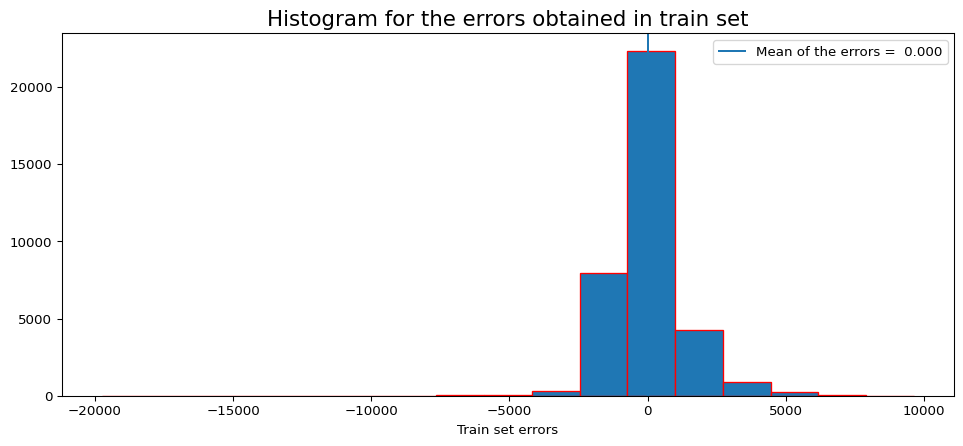

In [26]:
# Create a histogram for the errors obtained in the predicted values for the train set.
errors_train = y_train2_reshaped - y_train2_pred
print(errors_train)
plt.figure(figsize=(12,5), dpi=96)
plt.hist(errors_train, bins='sturges', edgecolor='r')
plt.title('Histogram for the errors obtained in train set', fontsize=16)
plt.axvline(errors_train.mean(), label=f'Mean of the errors = {errors_train.mean() : .3f}')
plt.xlabel('Train set errors')
plt.legend()
plt.show()

[[  -36.42928153]
 [-1009.57418883]
 [ -908.36885954]
 ...
 [ -814.34944889]
 [ -151.62444218]
 [ -542.73179826]]


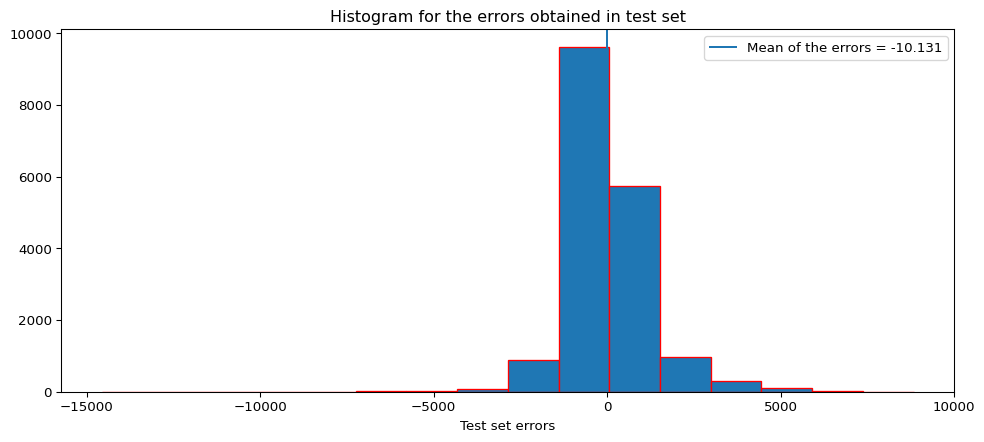

In [27]:
# Create a histogram for the errors obtained in the predicted values for the test set.
errors_test = y_test2_reshaped - y_test2_pred
print(errors_test)
plt.figure(figsize=(12,5), dpi=96)
plt.hist(errors_test, bins='sturges', edgecolor='r')
plt.title('Histogram for the errors obtained in test set')
plt.axvline(errors_test.mean(), label=f'Mean of the errors = {errors_test.mean() : .3f}')
plt.xlabel('Test set errors')
plt.legend()
plt.show()

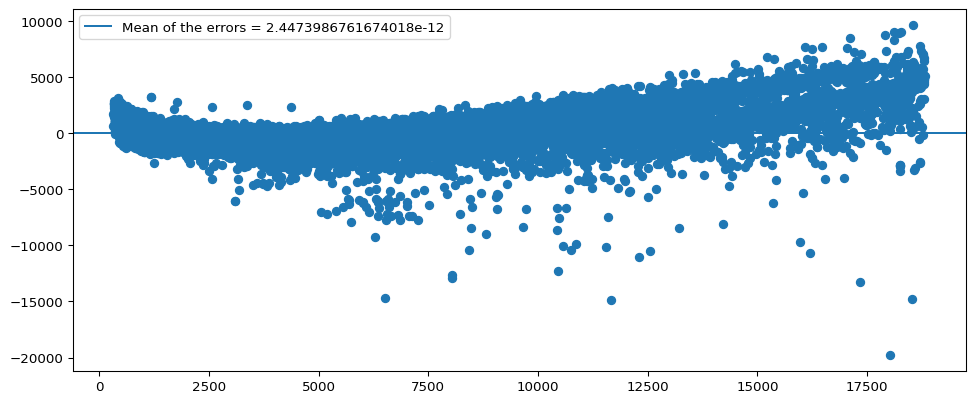

In [28]:
# Create a scatter plot between the errors and the dependent variable for the train set.
plt.figure(figsize=(12,5), dpi=96)
plt.scatter(y_train2, errors_train) 
plt.axhline(y=errors_train.mean(), label=f'Mean of the errors = {errors_train.mean()}')
plt.legend()
plt.show()